# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [161]:
# Do all imports and installs here
import pandas as pd
import itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json
import statsmodels.api as sm
from fbprophet import Prophet
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
util_data = json.load(open('utils.json','r'))
us_state_code = util_data['us_state_code']
us_code_state = {v: k for k, v in us_state_code.items()}
city_codes = util_data['city_codes']
immigration_codes = util_data['immigration_codes']

### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

In [320]:
# Read in the data here
df_airport = pd.read_csv("airport-codes_csv.csv")
df_immigration = pd.read_csv("immigration_data_sample.csv")
df_demographics = pd.read_csv("us-cities-demographics.csv",sep=';')
df_temperature = pd.read_csv("GlobalLandTemperaturesByState.csv")

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

### Temperature Data by State

In [235]:
df_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [242]:
# Performing cleaning tasks here
import datetime
df_temperature['dt'] = pd.to_datetime(df_temperature['dt'])
df_temperature['year'] = df_temperature['dt'].dt.year
df_temperature['month'] = df_temperature['dt'].dt.month
df_temperature['y'] = df_temperature['AverageTemperature']
df_temperature['ds'] = df_temperature['dt']

In [243]:
us_df_temperature = df_temperature[(df_temperature["Country"]=="United States")&(df_temperature['year'] > 1900)]

In [244]:
us_df_temperature['state_code'] = us_df_temperature.apply(lambda row: us_state_code[row["State"]],axis=1)
us_df_temperature = us_df_temperature[['dt','AverageTemperature','State','Country','year','month','state_code','y','ds']]


In [245]:
us_df_temperature.head(20)

,dt,AverageTemperature,State,Country,year,month,state_code,y,ds
9344,1901-01-01,7.603,Alabama,United States,1901,1,AL,7.603,1901-01-01
9345,1901-02-01,6.040,Alabama,United States,1901,2,AL,6.040,1901-02-01
9346,1901-03-01,11.596,Alabama,United States,1901,3,AL,11.596,1901-03-01
9347,1901-04-01,13.865,Alabama,United States,1901,4,AL,13.865,1901-04-01
9348,1901-05-01,20.816,Alabama,United States,1901,5,AL,20.816,1901-05-01
9349,1901-06-01,25.423,Alabama,United States,1901,6,AL,25.423,1901-06-01
9350,1901-07-01,27.414,Alabama,United States,1901,7,AL,27.414,1901-07-01
9351,1901-08-01,25.456,Alabama,United States,1901,8,AL,25.456,1901-08-01
9352,1901-09-01,21.989,Alabama,United States,1901,9,AL,21.989,1901-09-01
9353,1901-10-01,16.540,Alabama,United States,1901,10,AL,16.540,1901-10-01


In [186]:
alabama_temperature_df = us_df_temperature[us_df_temperature["state_code"]=="AL"]

In [187]:
alabama_temperature_df.head()

,dt,AverageTemperature,State,Country,year,month,state_code
9344,1901-01-01,7.603,Alabama,United States,1901,1,AL
9345,1901-02-01,6.040,Alabama,United States,1901,2,AL
9346,1901-03-01,11.596,Alabama,United States,1901,3,AL
9347,1901-04-01,13.865,Alabama,United States,1901,4,AL
9348,1901-05-01,20.816,Alabama,United States,1901,5,AL


In [218]:
alabama_temperature_df['ds'] = alabama_temperature_df['dt']
alabama_temperature_df['y'] = alabama_temperature_df['AverageTemperature']

In [219]:
alabama_temperature_df.head(20)

,dt,AverageTemperature,State,Country,year,month,state_code,ds,y
9344,1901-01-01,7.603,Alabama,United States,1901,1,AL,1901-01-01,7.603
9345,1901-02-01,6.040,Alabama,United States,1901,2,AL,1901-02-01,6.040
9346,1901-03-01,11.596,Alabama,United States,1901,3,AL,1901-03-01,11.596
9347,1901-04-01,13.865,Alabama,United States,1901,4,AL,1901-04-01,13.865
9348,1901-05-01,20.816,Alabama,United States,1901,5,AL,1901-05-01,20.816
9349,1901-06-01,25.423,Alabama,United States,1901,6,AL,1901-06-01,25.423
9350,1901-07-01,27.414,Alabama,United States,1901,7,AL,1901-07-01,27.414
9351,1901-08-01,25.456,Alabama,United States,1901,8,AL,1901-08-01,25.456
9352,1901-09-01,21.989,Alabama,United States,1901,9,AL,1901-09-01,21.989
9353,1901-10-01,16.540,Alabama,United States,1901,10,AL,1901-10-01,16.540


In [220]:
temperature_model = Prophet(interval_width=0.95)
temperature_model.fit(alabama_temperature_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [221]:
temperature_forecast = temperature_model.make_future_dataframe(periods=50, freq='MS')
temperature_forecast = temperature_model.predict(temperature_forecast)

<Figure size 1296x432 with 0 Axes>

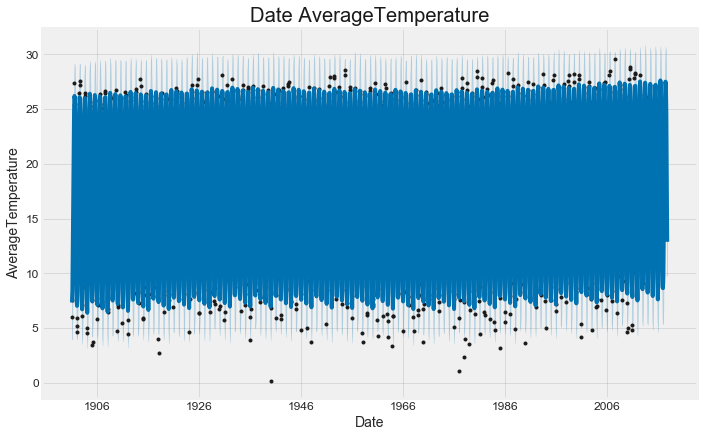

In [227]:
plt.figure(figsize=(18, 6))
temperature_model.plot(temperature_forecast, xlabel = 'Date', ylabel = 'AverageTemperature')
plt.title('Date AverageTemperature');

In [205]:
temperature_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1901-01-01,16.660980,4.380600,10.439198,16.660980,16.660980,-9.162002,-9.162002,-9.162002,0.247215,0.247215,0.247215,-9.409217,-9.409217,-9.409217,0.0,0.0,0.0,7.498978
1,1901-02-01,16.663801,5.369723,11.616556,16.663801,16.663801,-8.181127,-8.181127,-8.181127,0.123561,0.123561,0.123561,-8.304688,-8.304688,-8.304688,0.0,0.0,0.0,8.482674
2,1901-03-01,16.666348,9.584120,15.617382,16.666348,16.666348,-4.172944,-4.172944,-4.172944,0.123561,0.123561,0.123561,-4.296505,-4.296505,-4.296505,0.0,0.0,0.0,12.493405
3,1901-04-01,16.669169,13.404970,19.291213,16.669169,16.669169,-0.300291,-0.300291,-0.300291,-0.093666,-0.093666,-0.093666,-0.206625,-0.206625,-0.206625,0.0,0.0,0.0,16.368878
4,1901-05-01,16.671899,17.634998,24.097311,16.671899,16.671899,4.287230,4.287230,4.287230,0.055198,0.055198,0.055198,4.232032,4.232032,4.232032,0.0,0.0,0.0,20.959129
5,1901-06-01,16.674719,21.594743,27.963269,16.674719,16.674719,7.972937,7.972937,7.972937,-0.177519,-0.177519,-0.177519,8.150456,8.150456,8.150456,0.0,0.0,0.0,24.647656
6,1901-07-01,16.677449,22.962550,29.336103,16.677449,16.677449,9.363666,9.363666,9.363666,-0.093666,-0.093666,-0.093666,9.457332,9.457332,9.457332,0.0,0.0,0.0,26.041115
7,1901-08-01,16.680270,22.814452,28.995715,16.680270,16.680270,9.014369,9.014369,9.014369,-0.080566,-0.080566,-0.080566,9.094934,9.094934,9.094934,0.0,0.0,0.0,25.694639
8,1901-09-01,16.683091,19.929601,26.094896,16.683091,16.683091,6.395497,6.395497,6.395497,-0.074224,-0.074224,-0.074224,6.469722,6.469722,6.469722,0.0,0.0,0.0,23.078588
9,1901-10-01,16.685820,14.006680,20.358364,16.685820,16.685820,0.509345,0.509345,0.509345,0.247215,0.247215,0.247215,0.262130,0.262130,0.262130,0.0,0.0,0.0,17.195166


In [206]:
temperature_forecast['year'] = temperature_forecast['ds'].dt.year
temperature_forecast['month'] = temperature_forecast['ds'].dt.month

In [207]:
temperature_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,year,month
0,1901-01-01,16.660980,4.380600,10.439198,16.660980,16.660980,-9.162002,-9.162002,-9.162002,0.247215,...,0.247215,-9.409217,-9.409217,-9.409217,0.0,0.0,0.0,7.498978,1901,1
1,1901-02-01,16.663801,5.369723,11.616556,16.663801,16.663801,-8.181127,-8.181127,-8.181127,0.123561,...,0.123561,-8.304688,-8.304688,-8.304688,0.0,0.0,0.0,8.482674,1901,2
2,1901-03-01,16.666348,9.584120,15.617382,16.666348,16.666348,-4.172944,-4.172944,-4.172944,0.123561,...,0.123561,-4.296505,-4.296505,-4.296505,0.0,0.0,0.0,12.493405,1901,3
3,1901-04-01,16.669169,13.404970,19.291213,16.669169,16.669169,-0.300291,-0.300291,-0.300291,-0.093666,...,-0.093666,-0.206625,-0.206625,-0.206625,0.0,0.0,0.0,16.368878,1901,4
4,1901-05-01,16.671899,17.634998,24.097311,16.671899,16.671899,4.287230,4.287230,4.287230,0.055198,...,0.055198,4.232032,4.232032,4.232032,0.0,0.0,0.0,20.959129,1901,5
5,1901-06-01,16.674719,21.594743,27.963269,16.674719,16.674719,7.972937,7.972937,7.972937,-0.177519,...,-0.177519,8.150456,8.150456,8.150456,0.0,0.0,0.0,24.647656,1901,6
6,1901-07-01,16.677449,22.962550,29.336103,16.677449,16.677449,9.363666,9.363666,9.363666,-0.093666,...,-0.093666,9.457332,9.457332,9.457332,0.0,0.0,0.0,26.041115,1901,7
7,1901-08-01,16.680270,22.814452,28.995715,16.680270,16.680270,9.014369,9.014369,9.014369,-0.080566,...,-0.080566,9.094934,9.094934,9.094934,0.0,0.0,0.0,25.694639,1901,8
8,1901-09-01,16.683091,19.929601,26.094896,16.683091,16.683091,6.395497,6.395497,6.395497,-0.074224,...,-0.074224,6.469722,6.469722,6.469722,0.0,0.0,0.0,23.078588,1901,9
9,1901-10-01,16.685820,14.006680,20.358364,16.685820,16.685820,0.509345,0.509345,0.509345,0.247215,...,0.247215,0.262130,0.262130,0.262130,0.0,0.0,0.0,17.195166,1901,10


In [228]:
temperature_forecast_df = temperature_forecast[1320:].copy()

In [229]:
temperature_forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1320,2011-01-01,17.904746,4.732517,10.880780,17.904746,17.904746,-10.054193,-10.054193,-10.054193,-10.054193,-10.054193,-10.054193,0.0,0.0,0.0,7.850553
1321,2011-02-01,17.906665,6.088926,12.618698,17.906665,17.906665,-8.352463,-8.352463,-8.352463,-8.352463,-8.352463,-8.352463,0.0,0.0,0.0,9.554201
1322,2011-03-01,17.908398,10.604911,16.854348,17.908398,17.908398,-4.171579,-4.171579,-4.171579,-4.171579,-4.171579,-4.171579,0.0,0.0,0.0,13.736819
1323,2011-04-01,17.910316,14.678938,20.932266,17.910316,17.910316,-0.041920,-0.041920,-0.041920,-0.041920,-0.041920,-0.041920,0.0,0.0,0.0,17.868397
1324,2011-05-01,17.912173,19.085560,25.381371,17.912173,17.912173,4.297351,4.297351,4.297351,4.297351,4.297351,4.297351,0.0,0.0,0.0,22.209524
1325,2011-06-01,17.914092,22.514121,28.806940,17.914092,17.914092,7.833123,7.833123,7.833123,7.833123,7.833123,7.833123,0.0,0.0,0.0,25.747215
1326,2011-07-01,17.915949,23.659030,30.179257,17.915949,17.915949,9.196161,9.196161,9.196161,9.196161,9.196161,9.196161,0.0,0.0,0.0,27.112110
1327,2011-08-01,17.917868,24.076025,30.227614,17.917868,17.917868,9.216538,9.216538,9.216538,9.216538,9.216538,9.216538,0.0,0.0,0.0,27.134406
1328,2011-09-01,17.919787,21.268971,27.647289,17.919787,17.919787,6.408922,6.408922,6.408922,6.408922,6.408922,6.408922,0.0,0.0,0.0,24.328709
1329,2011-10-01,17.921644,15.449288,21.768063,17.921644,17.921644,0.771099,0.771099,0.771099,0.771099,0.771099,0.771099,0.0,0.0,0.0,18.692742


<Figure size 1296x432 with 0 Axes>

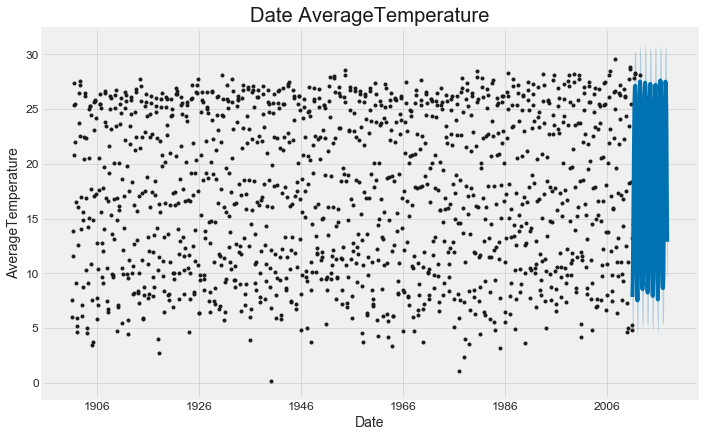

In [230]:
plt.figure(figsize=(18, 6))
temperature_model.plot(temperature_forecast_df, xlabel = 'Date', ylabel = 'AverageTemperature')
plt.title('Date AverageTemperature');

In [247]:
def get_temperature_prediction(df):
    temperature_model = Prophet(interval_width=0.95)
    temperature_model.fit(df)
    temperature_forecast = temperature_model.make_future_dataframe(periods=50, freq='MS')
    temperature_forecast = temperature_model.predict(temperature_forecast)
    temperature_forecast['year'] = temperature_forecast['ds'].dt.year
    temperature_forecast['month'] = temperature_forecast['ds'].dt.month
    temperature_forecast['AverageTemperature'] = temperature_forecast['yhat']
    return temperature_forecast[['year','month','AverageTemperature']]

In [257]:
us_temperature_pred_df = pd.DataFrame(columns=['year','month','AverageTemperature','state_code','state','country'])

In [258]:
us_temperature_pred_df

,year,month,AverageTemperature,state_code,state,country


In [259]:
for state_code,state in us_code_state.items():
    print(state_code,state)
    df = us_df_temperature[us_df_temperature["state_code"]==state_code].copy()
    df = get_temperature_prediction(df)
    df = df[df['year'] > 2010]
    df['state_code'] = state_code
    df['state'] = state
    df['country'] = 'United States'
    us_temperature_pred_df = us_temperature_pred_df.append(df,ignore_index=True)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AL Alabama


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AK Alaska


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AZ Arizona


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AR Arkansas


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CA California


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CO Colorado


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CT Connecticut


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


DE Delaware


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


DC District Of Columbia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


FL Florida


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


GA Georgia (State)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


HI Hawaii


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ID Idaho


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


IL Illinois


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


IN Indiana


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


IA Iowa


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KS Kansas


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KY Kentucky


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


LA Louisiana


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ME Maine


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MD Maryland


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MA Massachusetts


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MI Michigan


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MN Minnesota


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MS Mississippi


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MO Missouri


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MT Montana


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NE Nebraska


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NV Nevada


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NH New Hampshire


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NJ New Jersey


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NM New Mexico


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NY New York


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


NC North Carolina


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ND North Dakota
MP Northern Mariana Islands


ValueError: Dataframe has less than 2 non-NaN rows.

In [262]:
us_temperature_pred_df.head(20)

,year,month,AverageTemperature,state_code,state,country
0,2011,1,7.850553,AL,Alabama,United States
1,2011,2,9.554201,AL,Alabama,United States
2,2011,3,13.736819,AL,Alabama,United States
3,2011,4,17.868397,AL,Alabama,United States
4,2011,5,22.209524,AL,Alabama,United States
5,2011,6,25.747215,AL,Alabama,United States
6,2011,7,27.112110,AL,Alabama,United States
7,2011,8,27.134406,AL,Alabama,United States
8,2011,9,24.328709,AL,Alabama,United States
9,2011,10,18.692742,AL,Alabama,United States


In [263]:
us_temperature_pred_df.to_csv("us_temperature.csv",index=False)

### Immigration Data by State with Origin

In [342]:
df_immigration.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,admnum,fltno,visatype,origin_country,State,city_name,year,month,state_code,city_code
0,2027561,4084316,2016,4,209.0,209,HHW,20566.0,1.0,HI,...,5.658267e+10,00782,WT,JAPAN,Hawaii,HONOLULU,2016,4,HI,HHW
1,2171295,4422636,2016,4,582.0,582,MCA,20567.0,1.0,TX,...,9.436200e+10,XBLNG,B2,"MEXICO Air Sea, and Not Reported (I-94, no lan...",Texas,MCALLEN,2016,4,TX,MCA
2,589494,1195600,2016,4,148.0,112,OGG,20551.0,1.0,FL,...,5.578047e+10,00464,WT,GERMANY,Florida,KAHULUI - MAUI,2016,4,FL,OGG
3,2631158,5291768,2016,4,297.0,297,LOS,20572.0,1.0,CA,...,9.478970e+10,00739,B2,QATAR,California,LOS ANGELES,2016,4,CA,LOS
4,3032257,985523,2016,4,111.0,111,CHM,20550.0,3.0,NY,...,4.232257e+10,LAND,WT,FRANCE,New York,CHAMPLAIN,2016,4,NY,CHM


In [343]:
df_immigration = df_immigration[(df_immigration.i94addr.notnull())&(df_immigration.i94res.notnull())]
df_immigration = df_immigration[(df_immigration['i94addr'].isin(us_code_state))&(df_immigration['i94port'].isin(city_codes))]


In [344]:
df_immigration['i94res'] = df_immigration.apply(lambda row: str(int(row["i94res"])),axis=1)
df_immigration['i94yr'] = df_immigration.apply(lambda row: int(row["i94yr"]),axis=1)
df_immigration['i94mon'] = df_immigration.apply(lambda row: int(row["i94mon"]),axis=1)
df_immigration['cicid'] = df_immigration.apply(lambda row: int(row["cicid"]),axis=1)
df_immigration['origin_country'] = df_immigration.apply(lambda row: immigration_codes[row["i94res"]],axis=1)
df_immigration['State'] = df_immigration.apply(lambda row: us_code_state[row["i94addr"]],axis=1)
df_immigration['city_name'] = df_immigration.apply(lambda row: city_codes[row["i94port"]],axis=1)


In [345]:
df_immigration["year"] = df_immigration["i94yr"]
df_immigration["month"] = df_immigration["i94mon"]
df_immigration["state_code"] = df_immigration["i94addr"]
df_immigration["city_code"] = df_immigration["i94port"]

In [346]:
us_df_immigration = df_immigration[['cicid','year','month','origin_country','city_code','city_name','state_code','State']]


In [347]:
us_df_immigration.head()

,cicid,year,month,origin_country,city_code,city_name,state_code,State
0,4084316,2016,4,JAPAN,HHW,HONOLULU,HI,Hawaii
1,4422636,2016,4,"MEXICO Air Sea, and Not Reported (I-94, no lan...",MCA,MCALLEN,TX,Texas
2,1195600,2016,4,GERMANY,OGG,KAHULUI - MAUI,FL,Florida
3,5291768,2016,4,QATAR,LOS,LOS ANGELES,CA,California
4,985523,2016,4,FRANCE,CHM,CHAMPLAIN,NY,New York


In [348]:
us_df_immigration[us_df_immigration['state_code']=='FL']

,cicid,year,month,origin_country,city_code,city_name,state_code,State
2,1195600,2016,4,GERMANY,OGG,KAHULUI - MAUI,FL,Florida
17,2466971,2016,4,BRAZIL,FTL,FORT LAUDERDALE,FL,Florida
20,4042798,2016,4,ICELAND,ORL,ORLANDO,FL,Florida
28,2006623,2016,4,UNITED KINGDOM,ORL,ORLANDO,FL,Florida
31,5835717,2016,4,"MEXICO Air Sea, and Not Reported (I-94, no lan...",DET,DETROIT,FL,Florida
36,216657,2016,4,VENEZUELA,FTL,FORT LAUDERDALE,FL,Florida
37,2495693,2016,4,ITALY,NYC,NEW YORK,FL,Florida
39,4462449,2016,4,BRAZIL,ORL,ORLANDO,FL,Florida
40,800571,2016,4,ARGENTINA,PSP,PALM SPRINGS,FL,Florida
43,999282,2016,4,SPAIN,MIA,MIAMI,FL,Florida


In [327]:
us_df_immigration.to_csv("us_immigration.csv",index=False)

### U.S. Demographic Data by State

In [364]:
df_demographics.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Afroamerican,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [383]:
df_demographics[df_demographics['State Code']=='AL']

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
67,Montgomery,Alabama,35.4,94582.0,106004.0,200586,14955.0,9337.0,2.41,AL,White,73545
68,Huntsville,Alabama,38.1,91764.0,97350.0,189114,16637.0,12691.0,2.18,AL,Native,1755
101,Huntsville,Alabama,38.1,91764.0,97350.0,189114,16637.0,12691.0,2.18,AL,Latino,10887
212,Birmingham,Alabama,35.6,102122.0,112789.0,214911,13212.0,8258.0,2.21,AL,Asian,1500
375,Huntsville,Alabama,38.1,91764.0,97350.0,189114,16637.0,12691.0,2.18,AL,Afroamerican,61561
479,Dothan,Alabama,38.9,32172.0,35364.0,67536,6334.0,1699.0,2.59,AL,Asian,1175
500,Dothan,Alabama,38.9,32172.0,35364.0,67536,6334.0,1699.0,2.59,AL,Latino,1704
552,Montgomery,Alabama,35.4,94582.0,106004.0,200586,14955.0,9337.0,2.41,AL,Native,1277
598,Tuscaloosa,Alabama,29.1,47293.0,51045.0,98338,3647.0,4706.0,2.67,AL,Asian,2733


In [365]:
df_demographics.loc[df_demographics["Race"] == "American Indian and Alaska Native","Race"] = "Native"
df_demographics.loc[df_demographics["Race"] == "Black or African-American","Race"] = "Afroamerican"
df_demographics.loc[df_demographics["Race"] == "Hispanic or Latino","Race"] = "Latino"

In [421]:
races = list(set(df_demographics["Race"]))

In [422]:
races

['Asian', 'Native', 'Afroamerican', 'Latino', 'White']

In [433]:
us_demographics_avg_df = df_demographics.groupby(['State','State Code','Race'])['Median Age'].mean()


In [434]:
us_demographics_avg_df

State       State Code  Race        
Alabama     AL          Afroamerican    36.228571
                        Asian           36.228571
                        Latino          36.228571
                        Native          35.850000
                        White           36.228571
Alaska      AK          Afroamerican    32.200000
                        Asian           32.200000
                        Latino          32.200000
                        Native          32.200000
                        White           32.200000
Arizona     AZ          Afroamerican    35.037500
                        Asian           35.037500
                        Latino          35.037500
                        Native          35.037500
                        White           35.037500
Arkansas    AR          Afroamerican    32.766667
                        Asian           32.600000
                        Latino          32.766667
                        Native          32.766667
             

In [435]:
us_demographics_sum_df = df_demographics.groupby(['State','State Code','Race'])['Total Population','Count','Male Population','Female Population','Number of Veterans','Foreign-born'].sum()


In [436]:
us_demographics_sum_df

Total Population     Count  \
State      State Code Race                                       
Alabama    AL         Afroamerican           1049629    521068   
                      Asian                  1049629     28769   
                      Latino                 1049629     39313   
                      Native                  964790      8084   
                      White                  1049629    498920   
Alaska     AK         Afroamerican            298695     23107   
                      Asian                   298695     36825   
                      Latino                  298695     27261   
                      Native                  298695     36339   
                      White                   298695    212696   
Arizona    AZ         Afroamerican           4499542    296222   
                      Asian                  4499542    229183   
                      Latino                 4499542   1508157   
                      Native                 4499542    129708   
                      White                  4499542   3591611   
Arkansas   AR         Afroamerican            589879    149608   
                      Asian                   523373     22062   
                      Latino                  589879     77813   
                      Native                  589879      9381   
                      White                   589879    384733   
California CA         Afroamerican          24735329   2047009   
                      Asian                 24756101   4543730   
                      Latino                24822460   9856464   
                      Native                24308003    401386   
                      White                 24822460  14905129   
Colorado   CO         Afroamerican           2935669    208043   
                      Asian                  2935669    148790   
                      Latino                 2935669    703722   
                      Native                 2935669     62613   
                      White                  2935669   2463916   
...                                              ...       ...   
Tennessee  TN         Afroamerican           2152560    810758   
                      Asian                  2152560     73024   
                      Latino                 2152560    167962   
                      Native                 2079925     17638   
                      White                  2152560   1253142   
Texas      TX         Afroamerican          14066406   2130242   
                      Asian                 14223448    924552   
                      Latino                14299983   6311431   
                      Native                13664033    154497   
                      White                 14299983  10508923   
Utah       UT         Afroamerican            983952     21893   
                      Asian                  1050591     48801   
                      Latino                 1050591    201695   
                      Native                  983952     18746   
                      White                  1050591    889798   
Virginia   VA         Afroamerican           2363622    771569   
                      Asian                  2363622    167784   
                      Latino                 2363622    216760   
                      Native                 2363622     26160   
                      White                  2363622   1428158   
Washington WA         Afroamerican           2500107    187584   
                      Asian                  2500107    346995   
                      Latino                 2500107    324070   
                      Native                 2500107     60248   
                      White                  2500107   1913484   
Wisconsin  WI         Afroamerican           1413145    316896   
                      Asian                  1413145     73982   
                      Latino                 1413145    202117   
          

In [439]:
us_demographics_df = pd.concat([us_demographics_sum_df,us_demographics_avg_df],axis=1)
us_demographics_df.reset_index(inplace=True)
us_demographics_df["state_code"] = us_demographics_df["State Code"]
us_demographics_df["median_age"] = us_demographics_df["Median Age"]

In [440]:
us_demographics_df

,State,State Code,Race,Total Population,Count,Male Population,Female Population,Number of Veterans,Foreign-born,Median Age,state_code,median_age
0,Alabama,AL,Afroamerican,1049629,521068,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
1,Alabama,AL,Asian,1049629,28769,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
2,Alabama,AL,Latino,1049629,39313,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
3,Alabama,AL,Native,964790,8084,459208.0,505582.0,66724.0,43925.0,35.850000,AL,35.850000
4,Alabama,AL,White,1049629,498920,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
5,Alaska,AK,Afroamerican,298695,23107,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
6,Alaska,AK,Asian,298695,36825,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
7,Alaska,AK,Latino,298695,27261,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
8,Alaska,AK,Native,298695,36339,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
9,Alaska,AK,White,298695,212696,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000


In [446]:
for state_code in us_code_state:
    print(state_code)
    df = us_demographics_df.loc[us_demographics_df['state_code'] == state_code]
    total_population = df['Total Population'].max()
    male_population = df['Male Population'].max()
    female_population = df['Female Population'].max()
    veterans_population = df['Number of Veterans'].max()
    foreign_population = df['Foreign-born'].max()
    median_age = df['median_age'].max()
    
    us_demographics_df.loc[us_demographics_df['state_code'] == state_code,'Total Population'] = total_population
    us_demographics_df.loc[us_demographics_df['state_code'] == state_code,'Male Population'] = male_population
    us_demographics_df.loc[us_demographics_df['state_code'] == state_code,'Female Population'] = female_population
    us_demographics_df.loc[us_demographics_df['state_code'] == state_code,'Number of Veterans'] = veterans_population
    us_demographics_df.loc[us_demographics_df['state_code'] == state_code,'Foreign-born'] = foreign_population
    us_demographics_df.loc[us_demographics_df['state_code'] == state_code,'median_age'] = median_age

AL
AK
AZ
AR
CA
CO
CT
DE
DC
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
MP
OH
OK
OR
PW
PA
PR
RI
SC
SD
TN
TX
UT
VT
VI
VA
WA
WV
WI
WY


In [447]:
us_demographics_df

,State,State Code,Race,Total Population,Count,Male Population,Female Population,Number of Veterans,Foreign-born,Median Age,state_code,median_age
0,Alabama,AL,Afroamerican,1049629.0,521068,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
1,Alabama,AL,Asian,1049629.0,28769,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
2,Alabama,AL,Latino,1049629.0,39313,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
3,Alabama,AL,Native,1049629.0,8084,497248.0,552381.0,71543.0,52154.0,35.850000,AL,36.228571
4,Alabama,AL,White,1049629.0,498920,497248.0,552381.0,71543.0,52154.0,36.228571,AL,36.228571
5,Alaska,AK,Afroamerican,298695.0,23107,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
6,Alaska,AK,Asian,298695.0,36825,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
7,Alaska,AK,Latino,298695.0,27261,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
8,Alaska,AK,Native,298695.0,36339,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000
9,Alaska,AK,White,298695.0,212696,152945.0,145750.0,27492.0,33258.0,32.200000,AK,32.200000


In [448]:
us_demographics_df["percentage_male"] = us_demographics_df.apply(lambda row: float(row["Male Population"]/row["Total Population"])*100.0,axis=1)
us_demographics_df["percentage_female"] = us_demographics_df.apply(lambda row: float(row["Female Population"]/row["Total Population"])*100.0,axis=1)
us_demographics_df["percentage_veterans"] = us_demographics_df.apply(lambda row: float(row["Number of Veterans"]/row["Total Population"])*100.0,axis=1)
us_demographics_df["percentage_foreign_born"] = us_demographics_df.apply(lambda row: float(row["Foreign-born"]/row["Total Population"])*100.0,axis=1)
us_demographics_df["percentage_race"] = us_demographics_df.apply(lambda row: float(row["Count"]/row["Total Population"])*100.0,axis=1)



In [449]:
us_df_demographics = pd.pivot_table(us_demographics_df,values='percentage_race',index=["State","state_code","median_age","percentage_male","percentage_female","percentage_veterans","percentage_foreign_born"],columns=["Race"], aggfunc=np.mean, fill_value=0)
us_df_demographics = pd.DataFrame(us_df_demographics.to_records())

In [450]:
us_df_demographics

,State,state_code,median_age,percentage_male,percentage_female,percentage_veterans,percentage_foreign_born,Afroamerican,Asian,Latino,Native,White
0,Alabama,AL,36.228571,47.373691,52.626309,6.816027,4.968803,49.643064,2.740873,3.745419,0.770177,47.532985
1,Alaska,AK,32.200000,51.204406,48.795594,9.204038,11.134435,7.735985,12.328630,9.126701,12.165922,71.208423
2,Arizona,AZ,35.037500,49.504038,50.495962,5.878487,15.164054,6.583381,5.093474,33.518011,2.882693,79.821702
3,Arkansas,AR,32.766667,48.565723,51.434277,5.374662,10.528939,25.362490,3.740089,13.191349,1.590326,65.222359
4,California,CA,36.226471,49.464400,50.535600,3.739637,30.006119,8.246600,18.304914,39.707845,1.617027,60.046945
5,Colorado,CO,35.818750,49.549830,50.450170,6.400449,11.500990,7.086732,5.068351,23.971435,2.132836,83.930307
6,Connecticut,CT,35.185714,48.799263,51.200737,2.817698,25.504838,26.177391,5.455289,35.004364,1.211521,57.100819
7,Delaware,DE,36.400000,45.416012,54.583988,4.256709,4.636102,61.400559,1.657935,7.665689,0.575344,32.996095
8,District of Columbia,DC,33.800000,47.559013,52.440987,3.862231,14.149515,48.909894,5.217277,10.581083,0.911893,42.456131
9,Florida,FL,39.666667,47.622448,51.309540,5.711975,24.849141,24.314885,3.897943,28.572854,0.687962,70.006288


In [451]:
us_df_demographics.to_csv("us_demographics.csv",index=False)

In [452]:
us_df_demographics[us_df_demographics['state_code']=='FL']

,State,state_code,median_age,percentage_male,percentage_female,percentage_veterans,percentage_foreign_born,Afroamerican,Asian,Latino,Native,White
9,Florida,FL,39.666667,47.622448,51.30954,5.711975,24.849141,24.314885,3.897943,28.572854,0.687962,70.006288


### U.S. Airport Data by State 

In [328]:
df_airport.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [329]:
df_airport[df_airport['local_code']=='CHM']

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
34805,MX-0591,small_airport,Chamela Airport,51.0,NaN,MX,MX-JAL,Chamela,NaN,NaN,CHM,"-105.075278, 19.533333"
40826,SAHC,small_airport,Chos Malal Airport,2788.0,SA,AR,AR-Q,Chos Malal,SAHC,HOS,CHM,"-70.2225036621, -37.444698333699996"


In [330]:
us_df_airport = df_airport[df_airport["iso_country"]=="US"]
us_df_airport = us_df_airport[(us_df_airport["type"]=="small_airport")|(us_df_airport["type"]=="medium_airport")|(us_df_airport["type"]=="large_airport")]

In [331]:
us_df_airport["elevation_ft"] = us_df_airport.apply(lambda row: float(row["elevation_ft"]),axis=1)
us_df_airport["state_code"] = us_df_airport.apply(lambda row: row["iso_region"].split("-")[-1],axis=1)
us_df_airport["x_coordinate"] = us_df_airport.apply(lambda row: float(row["coordinates"].split(",")[0]),axis=1)
us_df_airport["y_coordinate"] = us_df_airport.apply(lambda row: float(row["coordinates"].split(",")[-1]),axis=1)

In [332]:
us_df_airport["country"] = us_df_airport["iso_country"]
us_df_airport["city_code"] = us_df_airport["local_code"]
us_df_airport = us_df_airport[["ident","type","name","elevation_ft","country","state_code","city_code","municipality","x_coordinate","y_coordinate"]]

In [333]:
us_df_airport

,ident,type,name,elevation_ft,country,state_code,city_code,municipality,x_coordinate,y_coordinate
1,00AA,small_airport,Aero B Ranch Airport,3435.0,US,KS,00AA,Leoti,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,US,AK,00AK,Anchor Point,-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,US,AL,00AL,Harvest,-86.770302,34.864799
5,00AS,small_airport,Fulton Airport,1100.0,US,OK,00AS,Alex,-97.818019,34.942803
6,00AZ,small_airport,Cordes Airport,3810.0,US,AZ,00AZ,Cordes,-112.165001,34.305599
7,00CA,small_airport,Goldstone /Gts/ Airport,3038.0,US,CA,00CA,Barstow,-116.888000,35.350498
8,00CL,small_airport,Williams Ag Airport,87.0,US,CA,00CL,Biggs,-121.763427,39.427188
11,00FA,small_airport,Grass Patch Airport,53.0,US,FL,00FA,Bushnell,-82.219002,28.645500
13,00FL,small_airport,River Oak Airport,35.0,US,FL,00FL,Okeechobee,-80.969200,27.230900
14,00GA,small_airport,Lt World Airport,700.0,US,GA,00GA,Lithonia,-84.068298,33.767502


In [334]:
us_df_airport.to_csv("us_airports.csv",index=False)

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

In [264]:
# Write code here
from pyspark.sql import SparkSession, SQLContext, GroupedData
from pyspark.sql.functions import *
spark = SparkSession.builder.\
config("spark.jars.packages","saurfang:spark-sas7bdat:2.0.0-s_2.11")\
.enableHiveSupport().getOrCreate()

In [265]:
spark

In [266]:
sqlContext = SQLContext(spark)
#allow unlimited time for SQL joins and parquet writes.
sqlContext.setConf("spark.sql.autoBroadcastJoinThreshold", "0")

In [453]:
temperatureDF = spark.read.csv("us_temperature.csv",header=True)
immigrationDF = spark.read.csv("us_immigration.csv",header=True)
demographicsDF = spark.read.csv("us_demographics.csv",header=True)
airportsDF = spark.read.csv("us_airports.csv",header=True)

In [454]:
# Create Dimension tables
temperatureDF.createOrReplaceTempView("temperature")
immigrationDF.createOrReplaceTempView("immigration")
demographicsDF.createOrReplaceTempView("demographics")
airportsDF.createOrReplaceTempView("airports")

In [458]:
fact_table = spark.sql("""
    SELECT 
        immig.year,
        immig.month,
        immig.origin_country,
        immig.State,
        immig.state_code,
        COUNT(immig.state_code) as number_immigrants,
        temp.AverageTemperature as avg_temperature,
        demo.median_age,
        demo.percentage_male,
        demo.percentage_female,
        demo.percentage_veterans,
        demo.percentage_foreign_born,
        demo.Afroamerican,
        demo.Asian,
        demo.Latino,
        demo.Native,
        demo.White,
        air.name as airport_name,
        air.x_coordinate,
        air.y_coordinate
    FROM immigration immig
    JOIN temperature temp ON immig.state_code=temp.state_code AND immig.year=temp.year AND immig.month=temp.month
    JOIN demographics demo ON demo.state_code=immig.state_code
    JOIN airports air ON air.state_code=immig.state_code and air.city_code=immig.city_code
    GROUP BY 1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20
    ORDER BY 1,2,3,4
""")

In [459]:
fact_table.count()

73

In [460]:
fact_table.show()

+----+-----+------------------+-------------+----------+-----------------+------------------+------------------+------------------+------------------+-------------------+-----------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+
|year|month|    origin_country|        State|state_code|number_immigrants|   avg_temperature|        median_age|   percentage_male| percentage_female|percentage_veterans|percentage_foreign_born|     Afroamerican|             Asian|            Latino|            Native|             White|        airport_name|       x_coordinate|      y_coordinate|
+----+-----+------------------+-------------+----------+-----------------+------------------+------------------+------------------+------------------+-------------------+-----------------------+-----------------+------------------+------------------+------------------+------------------+--------------

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [ ]:
# Perform quality checks here

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.